# Joining Weather Events & Motor Vehicle Claims

### Intro/ Questions


### Libraries and importng csvs

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [38]:
# install.packages("magrittr")
# install.packages("purrr")
library(dplyr)
library(magrittr) # better handling of pipes
library(purrr)

In [74]:
age <- "age.csv" %>%
              read_csv() 
ethnicity <- "ethnicity.csv" %>%
              read_csv() 
gender <- "gender.csv" %>%
              read_csv()  
month <- "month.csv" %>%
              read_csv() 
region <- "region.csv" %>%
              read_csv() 
road <- "road.csv" %>%
              read_csv() 
weather <- "weather.csv" %>%
              read_csv() 

Parsed with column specification:
cols(
  age = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  ethnicity = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  gender = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  month = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  region = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  road_factor = col_character(),
  year = col_double(),
  active_claims = col_double(),
  New_claims = col_double()
)

Parsed with column specification:
cols(
  Year = col_double(),
  Month =

In [40]:
#need to change column name of Weather Event and Affected Area to one word 

weather <- weather %>% rename (weather_event = "Weather Event") %>%
    rename (affected_area = "Affected Area") %>%
    rename (year = "Year")


In [41]:
#Group weather dataframe by year and collect all events in particular year in a new column 
weather_by_year <- weather %>%
    group_by(year) %>%
    summarise(weather_event = paste(weather_event, collapse = ","))

`summarise()` ungrouping output (override with `.groups` argument)



In [42]:
weather_by_year
# Double values seen below in weather_event column 

year,weather_event
<dbl>,<chr>
2010,"Flood,Storm,Flood,Flood,Flood,Flood,Storm,Flood,Flood,Flood,Winds,Winds,Storm,Storm,Flood,Flood"
2011,"Heavy Rain, Flood,Heavy Rain, Flood,Flood, Winds,Flood, Winds,Snowfall,Snowfall,Tornado,Heavy Rain, Winds,Heavy Rain, Winds,Tornado,Flood,Storm,Flood"
2012,"Tornado,Storm,Weather Bomb"
2013,"Storm,Storm,Storm,Storm,Storm"
2014,"Storm,Storm,Storm,Storm,Storm"
2015,"Storm,Storm,Storm,Flood,Tornado,Flood"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Storm, Cyclone,Cyclone,Heavy Rain, Flood"
2018,"Storm,Storm,Cyclone,Cyclone,Storm"


In [43]:
# remove duplicated values in weather_event column
weather_by_year <- weather_by_year %>%
    # remove spacing after commas
    separate_rows(weather_event, sep = ", ") %>%
    separate_rows(weather_event, sep = ",") %>%
    group_by(year) %>%
    summarise(weather_event = paste(unique(weather_event), collapse = ","))

weather_by_year 

`summarise()` ungrouping output (override with `.groups` argument)



year,weather_event
<dbl>,<chr>
2010,"Flood,Storm,Winds"
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm"
2012,"Tornado,Storm,Weather Bomb"
2013,Storm
2014,Storm
2015,"Storm,Flood,Tornado"
2016,"Cold Snap,Storm"
2017,"Flood,Storm,Cyclone,Heavy Rain"
2018,"Storm,Cyclone"


In [44]:
# Add total weather event column for each year 
weather_by_year  <- weather_by_year %>% 
  select(year, weather_event) %>% 
  mutate(n_event = str_count(weather_event, pattern =(",") ) + 1)

weather_by_year

year,weather_event,n_event
<dbl>,<chr>,<dbl>
2010,"Flood,Storm,Winds",3
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,"Tornado,Storm,Weather Bomb",3
2013,Storm,1
2014,Storm,1
2015,"Storm,Flood,Tornado",3
2016,"Cold Snap,Storm",2
2017,"Flood,Storm,Cyclone,Heavy Rain",4
2018,"Storm,Cyclone",2


In [47]:
#group Acc claims Month df by Year , then apply sum aggregation on claims column to give year-wise total claims (sum total of all the months claims of year) made 
month <- month %>%
    group_by(year)%>%
    summarise(new_claims_total = sum(New_claims))

`summarise()` ungrouping output (override with `.groups` argument)



In [48]:
month


year,new_claims_total
<dbl>,<dbl>
2011,32299
2012,31681
2013,32445
2014,32498
2015,36145
2016,37878
2017,38596


In [49]:
# Joining month df to weather dataframe 
weather_months_joined <- merge(x = month, y = weather_by_year, by = "year", all = TRUE)%>%
    arrange(desc(new_claims_total))

weather_months_joined

year,new_claims_total,weather_event,n_event
<dbl>,<dbl>,<chr>,<dbl>
2017,38596,"Flood,Storm,Cyclone,Heavy Rain",4
2016,37878,"Cold Snap,Storm",2
2015,36145,"Storm,Flood,Tornado",3
2014,32498,Storm,1
2013,32445,Storm,1
2011,32299,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,31681,"Tornado,Storm,Weather Bomb",3
2010,NA,"Flood,Storm,Winds",3
2018,NA,"Storm,Cyclone",2


In [50]:
#weather_months_joined %>% 
    #transform(year = as.numeric(year))

In [51]:
sapply(weather_months_joined, class)

year new_claims_total    weather_event          n_event 
       "numeric"        "numeric"      "character"        "numeric"

Warning message:
“Removed 4 rows containing missing values (position_stack).”


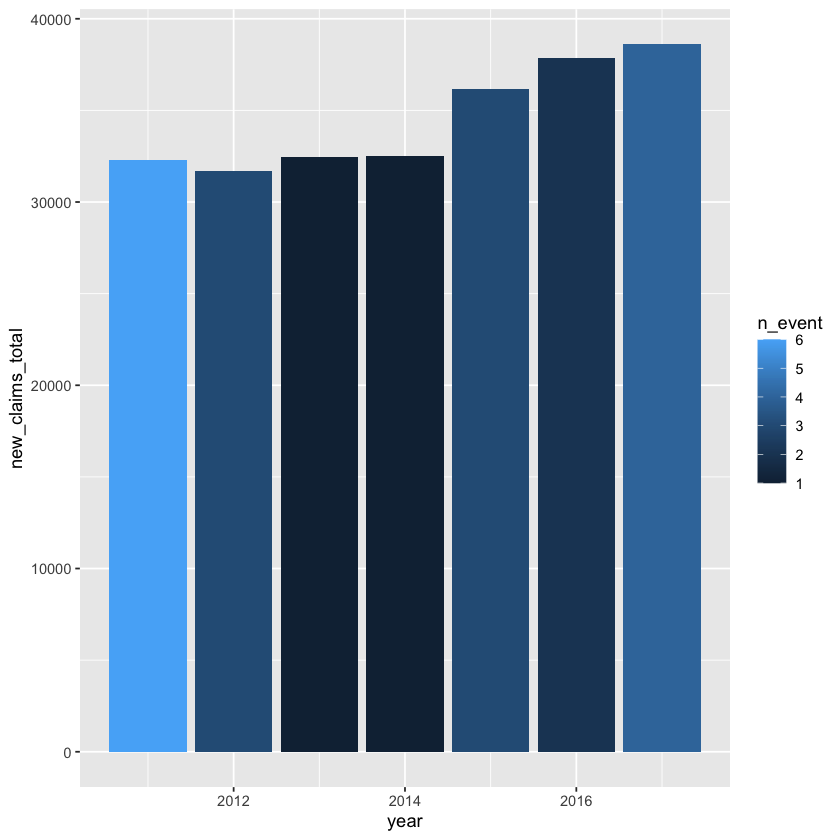

In [101]:
weather_months_joined%>%
  ggplot(aes(x = year, y = new_claims_total, fill = n_event)) +
  geom_col()

# this shows that from 2011 to 2017 , the number of new acc claims increased, 

## Research Question 2 - Age and Weather events - are older people more affected by weather events ? 

In [75]:
age

age,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
00-19,2011,9303,6465
00-19,2012,8485,5863
00-19,2013,8574,5932
00-19,2014,7916,5780
00-19,2015,7755,6341
00-19,2016,8165,6671
00-19,2017,8291,6706
20-29,2011,11318,7562
20-29,2012,11126,7438


In [88]:
age_newclaims_df <- age %>%
    select(age, year, New_claims)

In [89]:
age_newclaims_df


age,year,New_claims
<chr>,<dbl>,<dbl>
00-19,2011,6465
00-19,2012,5863
00-19,2013,5932
00-19,2014,5780
00-19,2015,6341
00-19,2016,6671
00-19,2017,6706
20-29,2011,7562
20-29,2012,7438


In [90]:
weather_by_year

year,weather_event,n_event
<dbl>,<chr>,<dbl>
2010,"Flood,Storm,Winds",3
2011,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,"Tornado,Storm,Weather Bomb",3
2013,Storm,1
2014,Storm,1
2015,"Storm,Flood,Tornado",3
2016,"Cold Snap,Storm",2
2017,"Flood,Storm,Cyclone,Heavy Rain",4
2018,"Storm,Cyclone",2


In [94]:
weather_age_joined <- merge(x = age_newclaims_df, y = weather_by_year, by = "year", all = TRUE) %>%
    arrange(age)
weather_age_joined

year,age,New_claims,weather_event,n_event
<dbl>,<chr>,<dbl>,<chr>,<dbl>
2011,00-19,6465,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,00-19,5863,"Tornado,Storm,Weather Bomb",3
2013,00-19,5932,Storm,1
2014,00-19,5780,Storm,1
2015,00-19,6341,"Storm,Flood,Tornado",3
2016,00-19,6671,"Cold Snap,Storm",2
2017,00-19,6706,"Flood,Storm,Cyclone,Heavy Rain",4
2011,20-29,7562,"Heavy Rain,Flood,Winds,Snowfall,Tornado,Storm",6
2012,20-29,7438,"Tornado,Storm,Weather Bomb",3


Warning message:
“Removed 4 rows containing missing values (position_stack).”


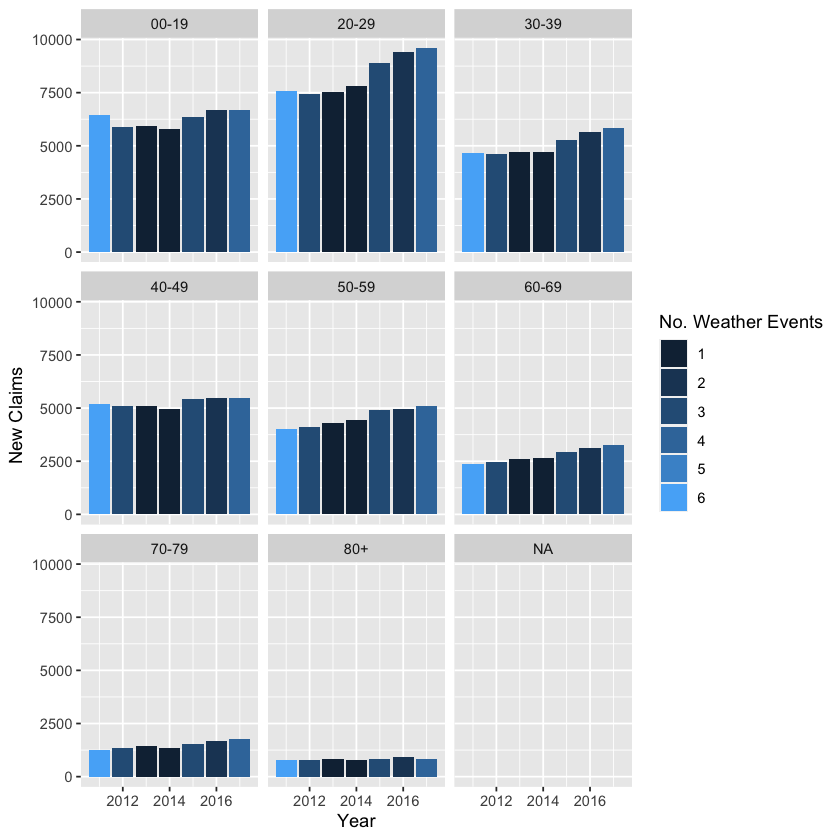

In [122]:
weather_age_joined %>%
  ggplot(aes(year, New_claims, group = age, fill = n_event)) +
    geom_col() +
    facet_wrap(~ age)+
    labs(x="Year", y="New Claims ")+
    guides(fill=guide_legend(title="No. Weather Events"))+
    # trying to change to discrete colours so can differentiate properly
    scale_color_manual(values = c("#FFDB6D", "#C4961A", "#F4EDCA", 
                "#D16103", "#C3D7A4", "#52854C"))